# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 4)
sns.set_palette(palette)

## Load Data

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## Define Functions for Plotting¶

In [3]:
# Define some function for plotting
def get_sub_plot(label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_dist(df, bins):
    ax = get_sub_plot()
    sns.distplot(df, ax = ax, bins = bins)
    plt.show()
    
def plot_swarmplot(x, y, df):
    ax = get_sub_plot()
    sns.swarmplot(x = x, y = y, data = df, ax = ax)
    plt.show()

## Is the distribution of body temperatures normal? 
> <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
> <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

Visualize distribution of body temperature first:

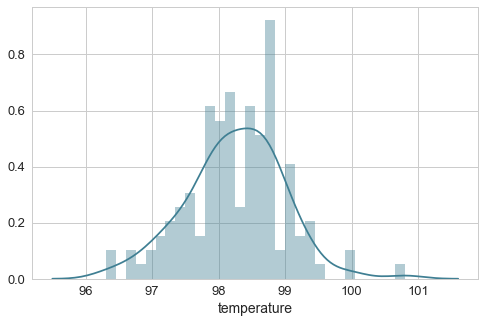

In [4]:
plot_dist(df['temperature'], bins = 30)

After visualizing the data, we can check normality using ECDF.

In [5]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

def plot_ecdf_with_sample(df_x, xlabel):
    ax = get_sub_plot()
        
    mean = np.mean(df_x)
    std = np.std(df_x)
    samples = np.random.normal(mean, std, size = 10000)
    x_theory, y_theory = ecdf(samples)
    #_ = plt.plot(x_theory, y_theory)
    sns.regplot(x = x_theory, y = y_theory, fit_reg = False, ax = ax)
    
    x, y = ecdf(df_x)
    #_ = plt.plot(x, y, marker = '.', linestyle = 'none')
    sns.regplot(x = x, y = y, fit_reg = False, ax = ax)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    _ = plt.legend(('Samples', 'Data'))
    plt.margins(0.02)
    plt.show()

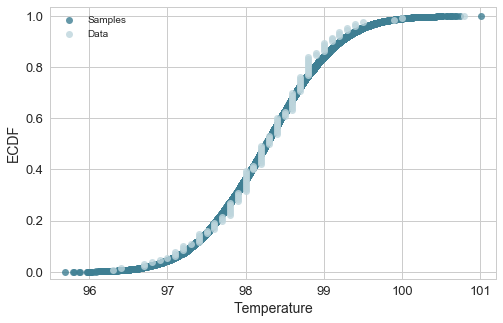

In [6]:
plot_ecdf_with_sample(df['temperature'], xlabel = 'Temperature')

Yes it looks like normal distribution is good approximation for body temperatures.

We can also do normality test.
Scipy do offer normality test: [link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html).

> Returns:
> * k2 : float or array
> -- s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
> * p-value : float or array
> -- A 2-sided chi squared probability for the hypothesis test.

In [7]:
from scipy.stats import normaltest

normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Based on ECDF & p value, which is 0.25, we can consider body temperatures to be normally distributed.

## Is the sample size large? Are the observations independent?
> <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

> Is the sample size large?

Based on the definition of Central Limit Theorem in https://onlinecourses.science.psu.edu/stat500/book/export/html/25,

> For a large sample size (rule of thumb: n ≥ 30), the data is approximately normally distributed, regardless of the distribution of the population one samples from.

Here we have 130 data points, hence is considered large sample size.

> Are the observations independent?

And yes, observations of blood temperatures, gender & heart rate of an individual human, which does not depend on each other, should be independent.

## Is the true population mean really 98.6 degrees F?
> <li> First, try a bootstrap hypothesis test.
> <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
> <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
> <li> Now try using the other test. How is the result be different? Why?

> First, try a bootstrap hypothesis test.

Null Hypothosis: population mean is 98.6 degrees F

Test Statistic: mean of body temperature

In [8]:
def diff_from_carl(data, temperature = 98.6):
    return np.mean(data) - 98.6

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
    
diff_obs = diff_from_carl(df['temperature'])
df['shifted_temperature'] = df['temperature'] - np.mean(df['temperature']) + 98.6
bs_replicates = draw_bs_reps(df['shifted_temperature'], diff_from_carl, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p_value

0.0

> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because we have a list of temperature data and a population mean. We are not having two list of temperature data for permutation.

> In this situation, is it appropriate to use the $t$ or $z$ statistic? 

According to [link](http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/).

> The general rule of thumb for when to use a t score is when your sample:

> Has a sample size below 30,

> Has an unknown population standard deviation.

> You must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. Otherwise, use the t-score.

As there are 130 sample & we can calculated the standatd deviation, Z-score can be used.

> <li> Now try using the other test. How is the result be different? Why?

Perform Z Test:

In [9]:
from statsmodels.stats.weightstats import ztest

ztest(x1 = df['temperature'], value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Perform T Test:

In [10]:
from scipy.stats import ttest_1samp

ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

p value of all tests are very small. We can reject the null hypothesis.

## Draw a small sample of size 10 from the data and repeat both frequentist tests. 
> <li> Which one is the correct one to use? 
> <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [11]:
small_sample = np.random.choice(df['temperature'], 10)

First, try a bootstrap hypothesis test.

In [12]:
diff_obs = diff_from_carl(small_sample)
small_sample_shifted = small_sample - np.mean(small_sample) + 98.6
bs_replicates = draw_bs_reps(small_sample_shifted, diff_from_carl, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p_value

0.052900000000000003

Perform Z Test:

In [13]:
ztest(x1 = small_sample, value = 98.6)

(-1.5453822789867782, 0.12225382413287933)

Perform T Test:

In [14]:
ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-1.5453822789867782, pvalue=0.1566540517338541)

> <li> Which one is the correct one to use? 

T score is the one to use since sample size is below 30.

> <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    
p value are larger when sample size is smaller. We are less confident to reject the null hypothesis.

## At what temperature should we consider someone's temperature to be "abnormal"?
> <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
> <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Boostrap approach considering confidence interval 95%:

In [15]:
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 98.12384615,  98.37461538])

Frequentist approach considering confidence interval 95% & based on the steps in [link](http://www.dummies.com/education/math/statistics/how-to-calculate-the-margin-of-error-for-a-sample-mean/):

In [16]:
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
std_err = std / math.sqrt(len(df['temperature']))
margin_of_err = z_value * std_err
conf_int = (mean - margin_of_err, mean + margin_of_err)
conf_int

(98.12367980442819, 98.37478173403336)

The 95% confidence interval lies between 98.124 and 98.374. For temperature outside this range we can consider to be "abnormal".

## Is there a significant difference between males and females in normal temperature?
> <li> What testing approach did you use and why?

Visualize swarmplot of females temperatures vs. male temperatures first:

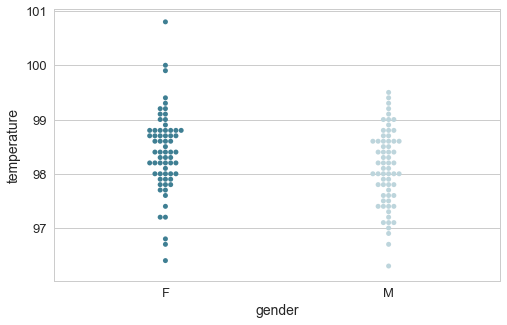

In [17]:
plot_swarmplot(x = 'gender', y = 'temperature', df = df)

Visualize using ECDF:

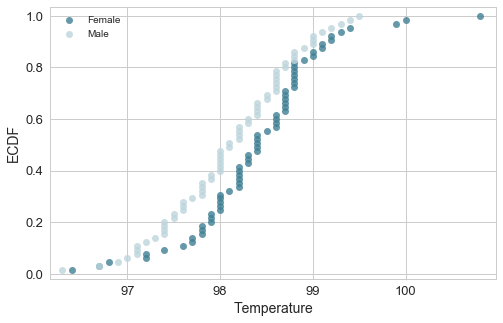

In [18]:
def plot_ecdf_2sam(df_1, df_2, xlabel, legend):    
    ax = get_sub_plot()
    
    x1, y1 = ecdf(df_1)
    sns.regplot(x = x1, y = y1, fit_reg = False, ax = ax)
    x2, y2 = ecdf(df_2)
    sns.regplot(x = x2, y = y2, fit_reg = False, ax = ax)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    _ = plt.legend(legend)
    plt.margins(0.02)
    plt.show()
    
male_t = df[df.gender == 'M']['temperature']
female_t = df[df.gender == 'F']['temperature']

plot_ecdf_2sam(female_t, male_t, xlabel = 'Temperature', legend = ('Female', 'Male'))

Inspect using describe function:

In [19]:
print(male_t.describe())
print(female_t.describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


Based on swarmplot & ECDF & describe function, yes looks like male temperatures and female temperatures are quite different.

Let's test using 2 sample T Test:

Null Hypothosis: males and females have same mean temperature.

Test Statistic: difference of mean of male body temperature & mean of female body temperature.

In [20]:
from scipy import stats

stats.ttest_ind(female_t, male_t)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

Other than T Test, we can also apply permutation test as we have to list of temperatures:

In [21]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size = 1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

empirical_diff_means = diff_of_means(female_t, male_t)

perm_replicates = draw_perm_reps(female_t, male_t, 
                                 diff_of_means, size = 10000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0126

As p value of both tests are very small (0.024 & 0.012), we can reject the null hypothosis.
Therefore, there is a significant difference between males and females in normal temperature.

> <li> Write a story with your conclusion in the context of the original problem.

As we found that there is significant difference between males and females in normal temperature, it might be worthy to rethink about previous findings in the context of gender.

## Conclusion

1. Body temperatures are normally distributed.
2. True population mean of body temperatures is **not** 98.6 degrees F as reported by Carl Wunderlich. Instead, with 95% confidence interval, body temperature lies between 98.123 degrees F and 98.374 degrees F.
3. There is significant difference between males and females in normal temperature.